In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

import pickle

In [3]:
df = pd.read_csv('data/coordinates_3_axes.csv').drop(['Unnamed: 0'], axis=1)
df.head(10)

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,gesture
0,0.655300,0.797478,-1.246077e-07,0.638530,0.789618,-0.009517,0.626456,0.774549,-0.017395,0.627940,...,0.678428,0.764551,-0.032858,0.670640,0.779527,-0.030473,0.666318,0.783533,-0.026839,RightIndexExtended
1,0.656982,0.795708,-1.155886e-07,0.639761,0.789950,-0.010876,0.626459,0.776845,-0.020032,0.626465,...,0.677158,0.765850,-0.033579,0.671602,0.780474,-0.030501,0.670305,0.781371,-0.026253,RightIndexExtended
2,0.639966,0.805850,-1.113507e-07,0.622443,0.801691,-0.010016,0.608082,0.789487,-0.017808,0.604689,...,0.657206,0.784563,-0.032015,0.652515,0.796286,-0.029051,0.652769,0.796856,-0.025029,RightIndexExtended
3,0.586551,0.829212,-1.664201e-07,0.564562,0.824383,-0.006751,0.546489,0.811764,-0.013807,0.536044,...,0.580038,0.805733,-0.035127,0.582535,0.818498,-0.031384,0.589371,0.814394,-0.027303,RightIndexExtended
4,0.617386,0.804443,-1.801220e-07,0.597102,0.799710,-0.009210,0.578753,0.783525,-0.016062,0.575107,...,0.629085,0.779588,-0.032732,0.625388,0.792956,-0.029057,0.628077,0.793185,-0.024732,RightIndexExtended
5,0.681748,0.754461,-1.391937e-07,0.659762,0.733224,-0.006598,0.650564,0.701524,-0.011579,0.658038,...,0.709125,0.691953,-0.026055,0.700085,0.710291,-0.022315,0.694851,0.722158,-0.016915,RightIndexExtended
6,0.612874,0.771584,-1.902044e-07,0.589904,0.757670,-0.010204,0.574389,0.731170,-0.017582,0.570312,...,0.629471,0.721322,-0.035450,0.623135,0.741180,-0.031387,0.623171,0.749525,-0.025610,RightIndexExtended
7,0.688335,0.790109,-4.173204e-08,0.675728,0.781218,-0.012588,0.667712,0.759930,-0.020942,0.672397,...,0.729023,0.764134,-0.035865,0.715558,0.779661,-0.032581,0.705217,0.782809,-0.027736,RightIndexExtended
8,0.723751,0.815432,-1.093951e-07,0.705919,0.797034,-0.010985,0.701458,0.768754,-0.018914,0.715519,...,0.765567,0.767193,-0.028304,0.754260,0.782939,-0.025070,0.745706,0.787789,-0.020063,RightIndexExtended
9,0.542085,0.892374,-3.226319e-08,0.525289,0.889364,-0.009720,0.509935,0.882299,-0.018784,0.498341,...,0.548285,0.897043,-0.040019,0.542863,0.904883,-0.037869,0.542489,0.903601,-0.034513,RightIndexExtended


In [3]:
X = df.drop('gesture', axis=1, inplace=False)
Y = df['gesture']
# Testing overfitting with 90% test size
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

print("Ejemplos usados para entrenar: ", len(x_train))
print("Ejemplos usados para test: ", len(x_test))

Ejemplos usados para entrenar:  696
Ejemplos usados para test:  174


### Model training

In [4]:
knn = KNeighborsClassifier(3)
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train, y_train)))

Accuracy of K-NN classifier on training set: 0.91


In [5]:
pred = knn.predict(x_test)

<AxesSubplot: >

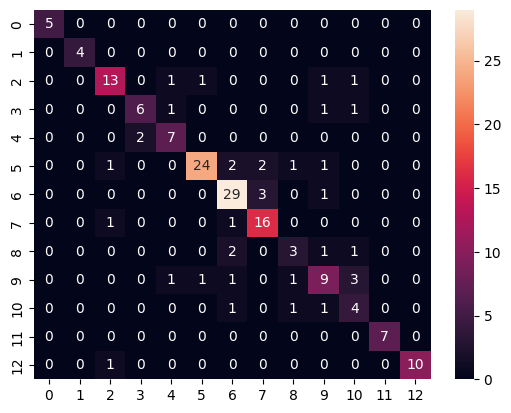

In [6]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

In [7]:
print(classification_report(y_test, pred))

                    precision    recall  f1-score   support

   ExtendedHandEnd       1.00      1.00      1.00         5
 ExtendedHandStart       1.00      1.00      1.00         4
   LeftIndexClosed       0.81      0.76      0.79        17
 LeftIndexExtended       0.75      0.67      0.71         9
     LeftIndexHook       0.70      0.78      0.74         9
              None       0.92      0.77      0.84        31
           PinchIn       0.81      0.88      0.84        33
          PinchOut       0.76      0.89      0.82        18
  RightIndexClosed       0.50      0.43      0.46         7
RightIndexExtended       0.60      0.56      0.58        16
    RightIndexHook       0.40      0.57      0.47         7
         ThumbDown       1.00      1.00      1.00         7
           ThumbUp       1.00      0.91      0.95        11

          accuracy                           0.79       174
         macro avg       0.79      0.79      0.78       174
      weighted avg       0.80      0.7

In [11]:
with open('models/knn.pkl', 'wb') as file:
    pickle.dump(knn, file)
    file.close()

### Elbow Method

In [9]:
test_error_rates = []

for k in range(2,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train) 
   
    y_pred = knn_model.predict(x_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

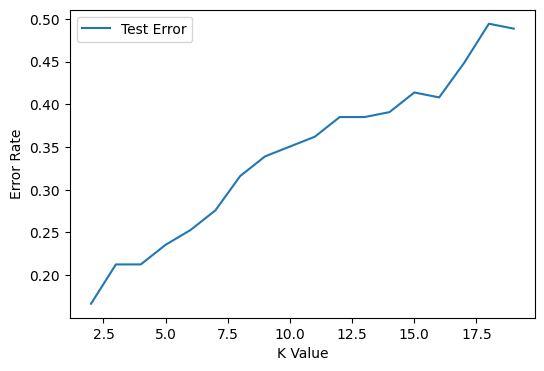

In [10]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(2,20),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")